# **Iris flower classification** 
is a very popular machine learning project. The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.

# **Dataset:**
    
    The dataset contains 3 classes of 50 instances each,where each class refers to a type of iris plant. one class is linealy separable from other 2; the later are not linearly separable from each other.

    *Attribute Information:*
        
        1.sepal length in cm
        2.sepal width in cm
        3.petal length in cm
        4.petal width in cm
        5.class: -- iris setosa -- iris versicolour -- iris virginica

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [4]:
df=pd.read_csv('IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

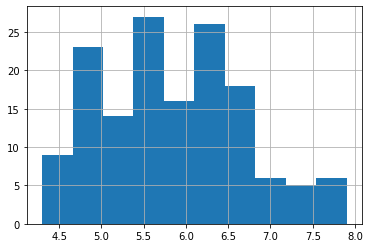

In [12]:
df['sepal_length'].hist()

<AxesSubplot:>

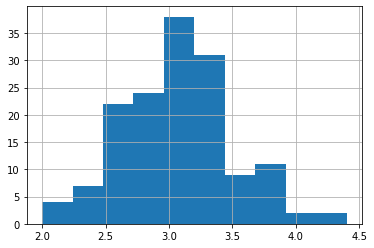

In [13]:
df['sepal_width'].hist()

<AxesSubplot:>

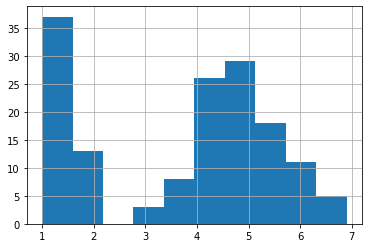

In [14]:
df['petal_length'].hist()

<AxesSubplot:>

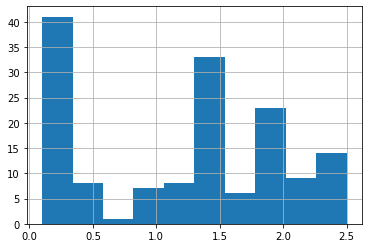

In [15]:
df['petal_width'].hist()

In [21]:
#scatter plot 
colors=['red','yellow','blue']
species=['Iris-versicolor ','Iris-virginica','Iris-setosa']

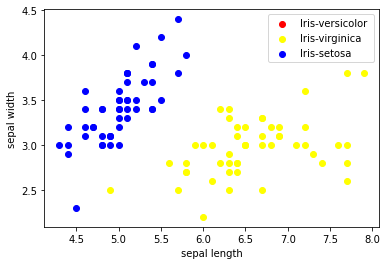

In [25]:
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

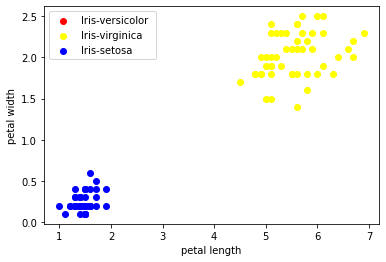

In [26]:
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

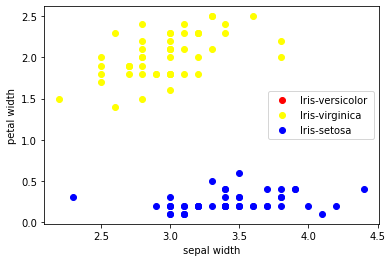

In [27]:
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

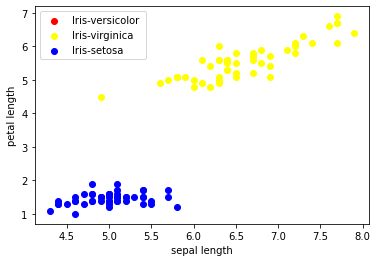

In [28]:
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

# **Correlation Matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. the variable is in the range of -1 to 1. if two variables have high correlation. we can neglect one variable from those two.

In [29]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

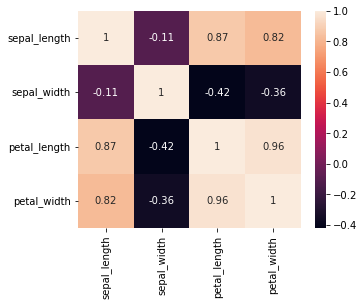

In [31]:
corr=df.corr()
fig ,ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

# **Label Encoder**
In machine learning, we usually deal with datasets which contains multiple labels on one or more than one columns. These labels can be in the form of words or numbers.
label encoding refers to converting the labels into numeric form so as to convert into the machine-readable form.

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [37]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print("accuracy score of Logistic Regression model:",model.score(x_test,y_test)*100)

accuracy score of Logistic Regression model: 95.55555555555556


# Iris flower predictor

In [48]:
input=np.array([[5.1,3.5,1.4,0.2]])
prediction=model.predict(input)
if (prediction==0):
    print("Iris-setosa")
elif (prediction==1):
    print('Iris-versicolor')
else:
    print('Iris-virginicia')

Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
